In [135]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fft2, ifft2, fftshift, ifftshift
import PIL.Image

In [136]:
ruta_archivo = "./IXI002-Guys-0828-T1.nii.gz"

In [137]:
img=nib.load(ruta_archivo)
data=img.get_fdata()

In [138]:
slice=data[:,:,75]

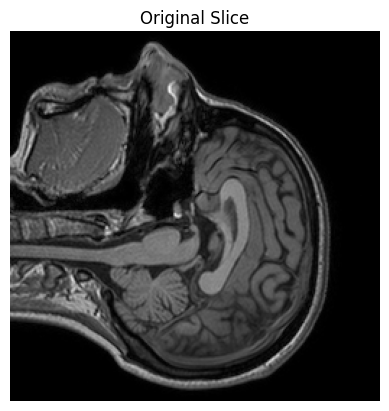

In [139]:
plt.imshow(slice,cmap='gray')
plt.title("Original Slice")
plt.gca().set_axis_off()
plt.show()

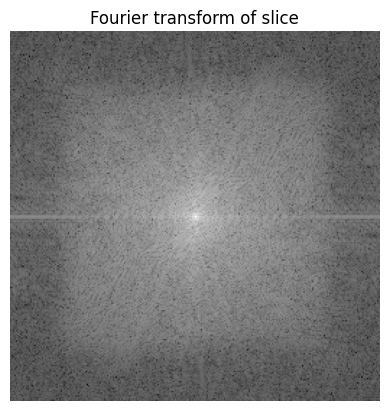

In [140]:
#Fourier transform:
slice_fft=fftshift(fft2(slice))
plt.imshow(np.log(np.abs(slice_fft) + 1),cmap= "gray")
plt.title("Fourier transform of slice")
plt.axis("off")
plt.show()

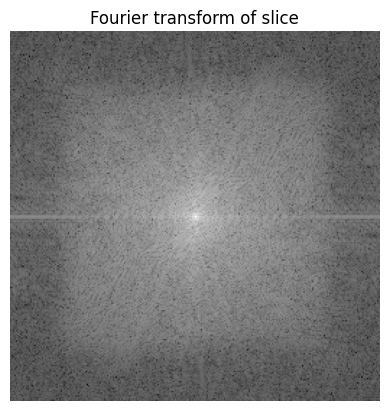

In [141]:
#now with numpy
fft_corte= np.fft.fft2(slice)
fft_centrado = np.fft.fftshift(fft_corte)
magnitud = np.abs(fft_centrado)
espectro = np.log(magnitud + 1)

plt.imshow(espectro, cmap="gray")
plt.title("Fourier transform of slice")
plt.axis("off")
plt.show()

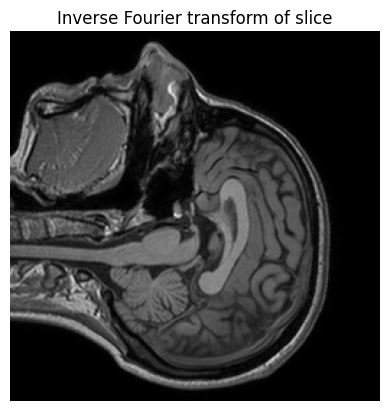

In [142]:
#reconstruct using ift
reconstruido = np.abs(np.fft.ifft2(fft_corte))
plt.imshow(reconstruido, cmap="gray")
plt.title("Inverse Fourier transform of slice")
plt.axis("off")
plt.show()

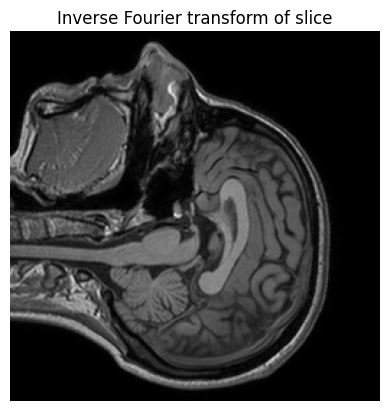

In [143]:
#reconstruct using ift scipy
reconstructed = np.abs(ifft2(ifftshift(slice_fft)))
plt.imshow(reconstructed, cmap="gray")
plt.title("Inverse Fourier transform of slice")
plt.axis("off")
plt.show()

In [144]:
#Eliminate the low frequencies
rows, cols = slice.shape
centro =(rows//2, cols//2)
radio = 40
y,x = np.ogrid[:rows, :cols]

distancia_centro = (x - centro[1])**2 + (y - centro[0])**2
mascara = np.ones((rows, cols))
mascara[distancia_centro > radio**2] = 0

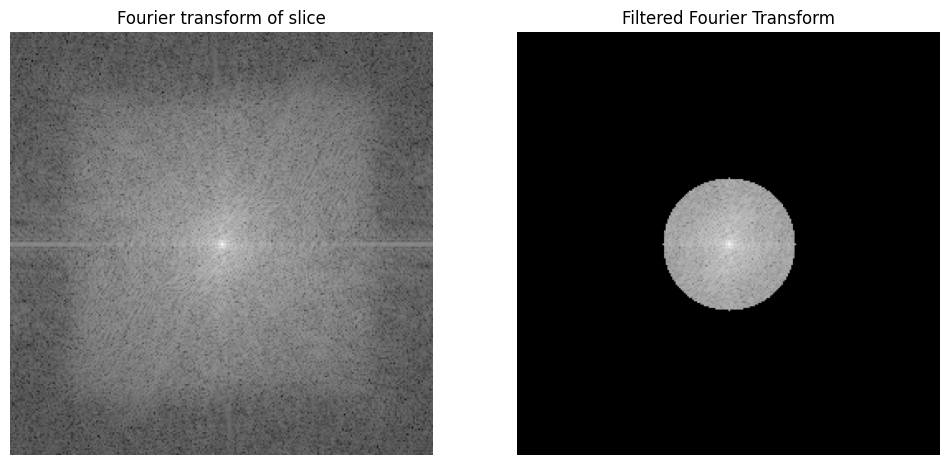

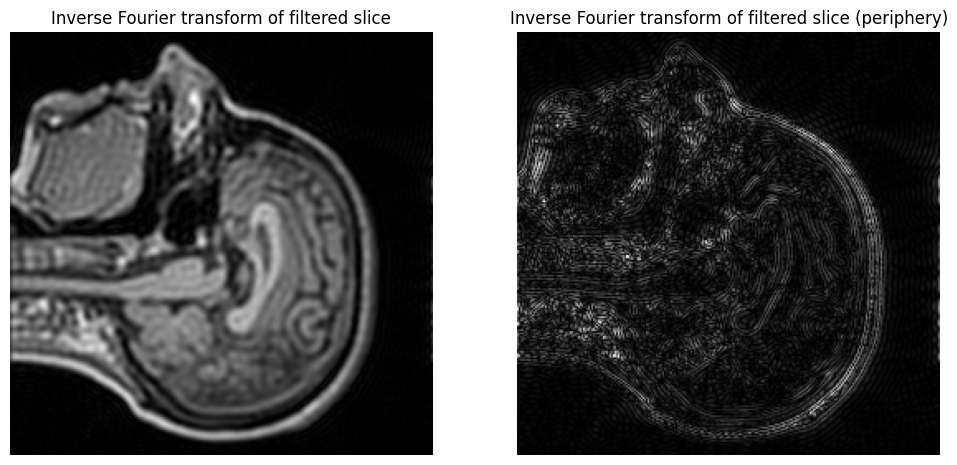

In [145]:
fft_filtrado = slice_fft * mascara
inverse_mask = 1-mascara
fft_filtrado2 = slice_fft * inverse_mask
reconstruced_filtered = np.abs(ifft2(ifftshift(fft_filtrado)))
reconstruced_filtered2 = np.abs(ifft2(ifftshift(fft_filtrado2)))

plt.figure(figsize=(12,6))

plt.subplot(121), plt.imshow(np.log(np.abs(slice_fft)+1), cmap="gray")
plt.axis("off")
plt.title("Fourier transform of slice")
plt.subplot(122), plt.imshow(np.log(np.abs(fft_filtrado)+1), cmap="gray")
plt.axis("off")
plt.title("Filtered Fourier Transform")
plt.show()

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(reconstruced_filtered, cmap="gray")
plt.axis("off")
plt.title("Inverse Fourier transform of filtered slice")
plt.subplot(122), plt.imshow(reconstruced_filtered2, cmap="gray")
plt.axis("off")
plt.title("Inverse Fourier transform of filtered slice (periphery)")
plt.show()

In [146]:
#Binary mask
mask=np.zeros((rows,cols))

points_to_conserve=int(0.1*rows*cols)

indices_to_conserve=np.random.choice(rows*cols,points_to_conserve,replace=False)
np.put(mask,indices_to_conserve,1)

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))

binary_masked_slice

array([[   0.          -0.j        ,    0.          +0.j        ,
          -0.          +0.j        , ...,    0.          +0.j        ,
           0.          -0.j        ,    0.          +0.j        ],
       [   0.          +0.j        ,    0.          +0.j        ,
           0.          -0.j        , ...,    0.          -0.j        ,
          -0.          +0.j        ,  237.71660923  -7.65137589j],
       [   0.          +0.j        ,    0.          +0.j        ,
           0.          -0.j        , ...,    0.          +0.j        ,
         396.70907563-332.6230616j ,    0.          -0.j        ],
       ...,
       [   0.          -0.j        ,   -0.          +0.j        ,
        -616.69230473-515.08160547j, ...,   -0.          +0.j        ,
           0.          -0.j        ,    0.          +0.j        ],
       [   0.          +0.j        ,   -0.          +0.j        ,
           0.          +0.j        , ...,   -0.          +0.j        ,
          -0.          +0.j        

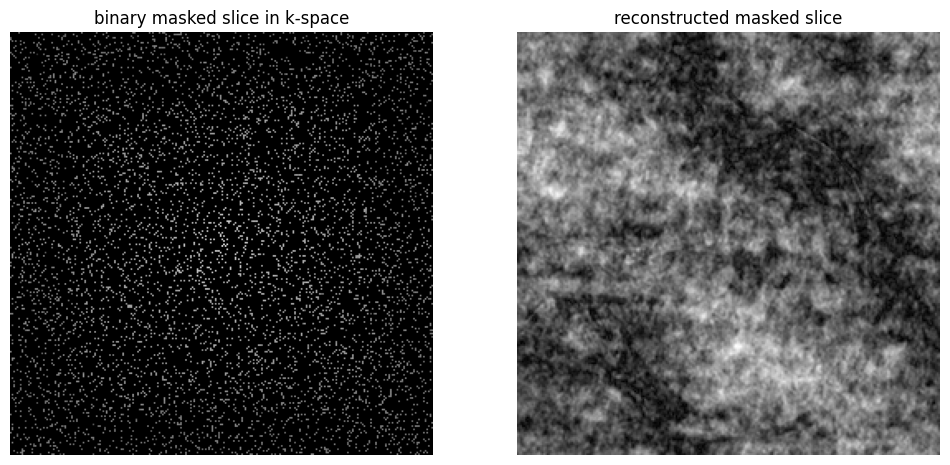

In [147]:
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.axis("off")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.axis("off")
plt.title("reconstructed masked slice")
plt.show()

In [148]:
#Binary mask v2
mask=np.zeros((rows,cols))

points_to_conserve=int(0.05*rows*cols)

indices_to_conserve=np.random.choice(rows*cols//2,points_to_conserve,replace=False)

for idx in indices_to_conserve:
    i,j = idx//cols, idx%cols
    mask[i,j]=1
    asym_i, asym_j = (rows - 1 - i), (cols - 1 - j)
    mask[asym_i, asym_j]=1

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))


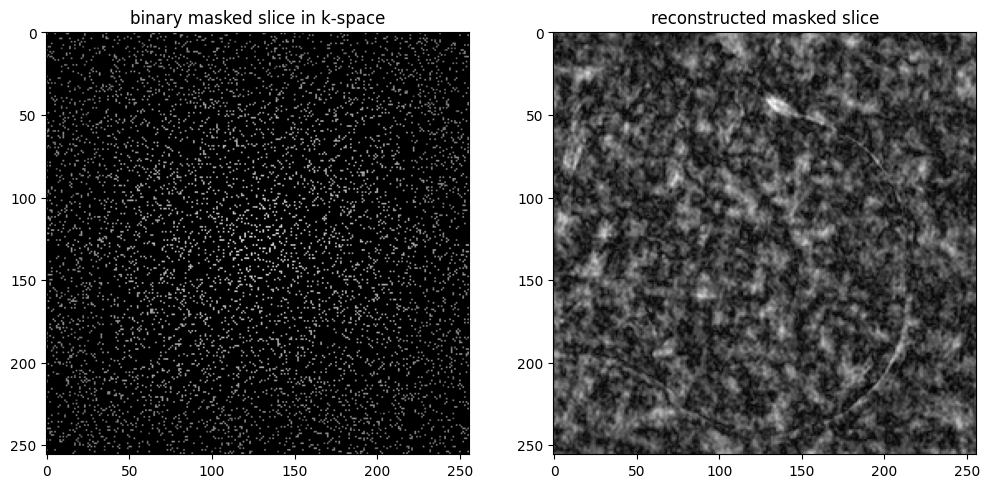

In [149]:
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()

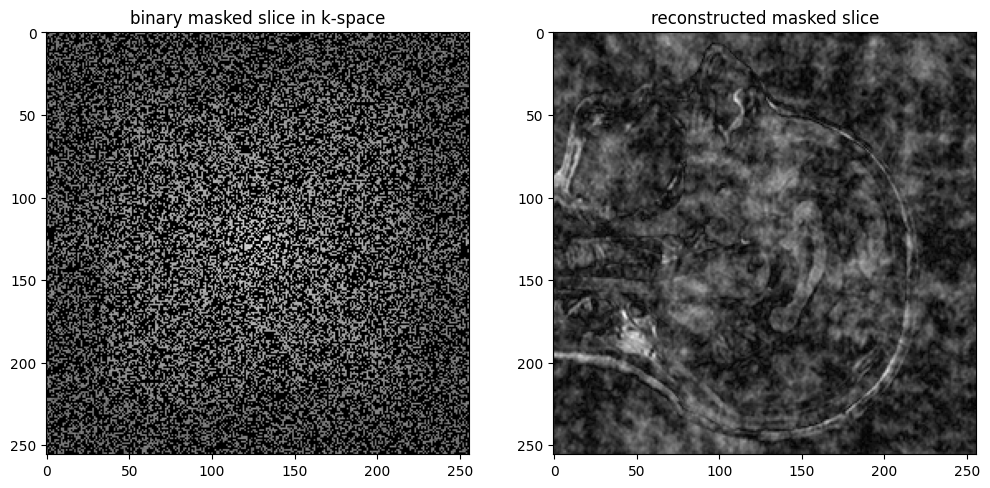

In [150]:
#Binary mask v2
mask=np.zeros((rows,cols))

points_to_conserve=int(0.2*rows*cols)

indices_to_conserve=np.random.choice(rows*cols//2,points_to_conserve,replace=False)

for idx in indices_to_conserve:
    i,j = idx//cols, idx%cols
    mask[i,j]=1
    mask[255-i, 255-j]=1
    mask[rows//2,cols//2]=0

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()


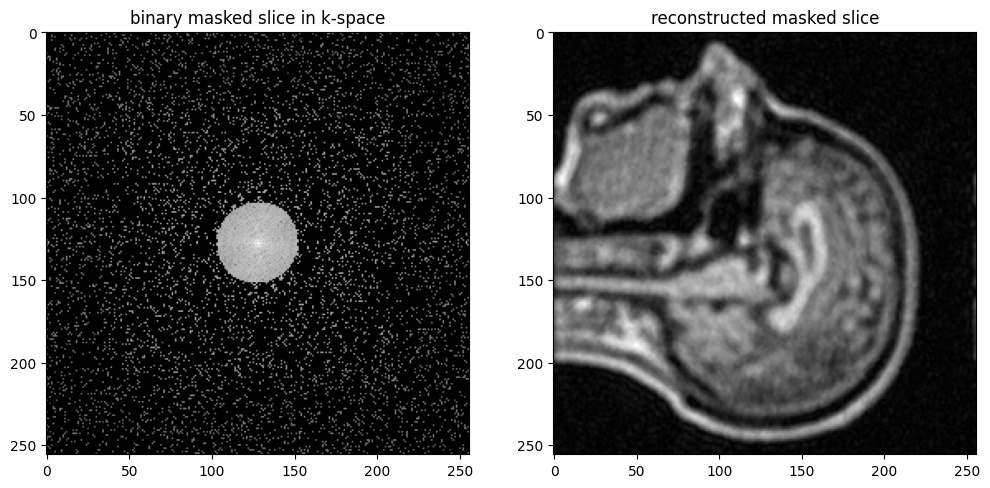

In [151]:
#binary mask protecting the center
mask= np.ones((256,256))
centro = 128
radio_protegido = 25
coords=[]
for x in range(256):
    for y in range(256):
        dist = np.sqrt((x-centro)**2 + (y-centro)**2)
        if dist>radio_protegido:
            coords.append((x,y))
total_pixeles = len(coords)
pixeles_tapar = int(0.9*total_pixeles)

while 256**2-np.sum(mask) < pixeles_tapar:
    x,y = coords[np.random.randint(len(coords))] 
    x_opuesto=255-x
    y_opuesto=255-y
    if mask[x,y] == 1 and mask[x_opuesto,y_opuesto] == 1:
        mask[x,y] = 0
        mask[x_opuesto,y_opuesto] = 0

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()

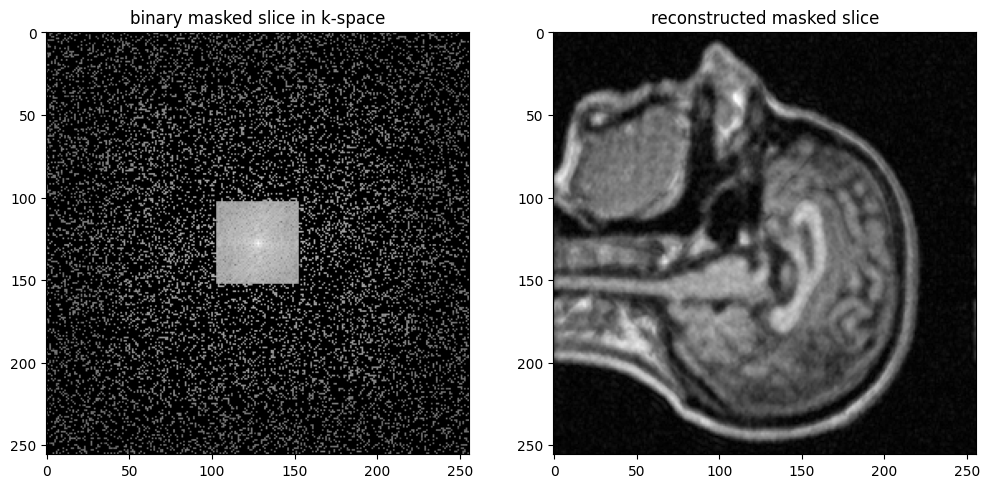

In [152]:
mask=np.zeros((rows,cols))

points_to_conserve=int(0.1*rows*cols)

indices_to_conserve=np.random.choice(rows*cols//2,points_to_conserve,replace=False)
centro = 128
radio_protegido = 25

for idx in indices_to_conserve:
    i,j = idx//cols, idx%cols
    mask[i,j]=1
    mask[255-i, 255-j]=1

for i in range(centro-radio_protegido,centro+radio_protegido):
    for j in range(centro-radio_protegido,centro+radio_protegido):
        mask[i,j]=1

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()


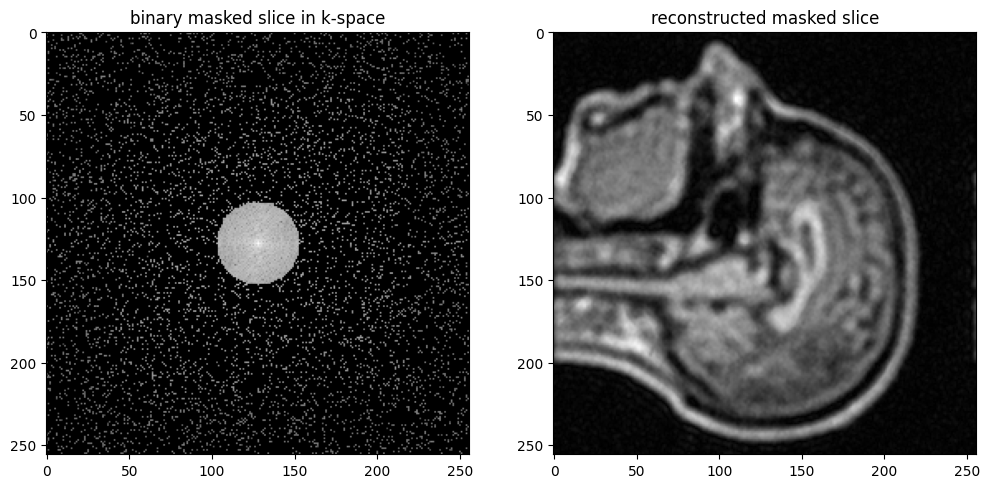

In [153]:
mask = np.ones((256,256))
centro = 128
radio_protegido = 25

indices=[(i,j) for i in range(256) for j in range(256) if np.sqrt((i-centro)**2 + (j-centro)**2) > radio_protegido]

num_seleccionado = np.random.choice(len(indices),int(0.9*len(indices)),replace=False)
indices_a_tapar = [indices[i] for i in num_seleccionado]

for idx in indices_a_tapar:
    mask[idx] = 0

binary_masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(binary_masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()

porcentaje de pixeles tapados: 0.98895263671875


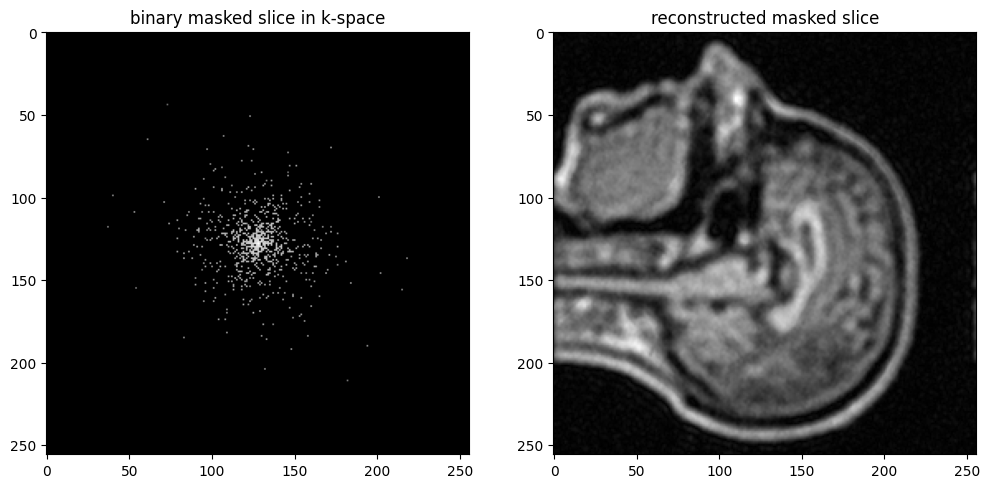

In [154]:
p = 0.957
x,y = np.indices((256,256))

r = np.sqrt((x-256//2)**2 + (y-256//2)**2)

probabilidad_quedarse=p**(r)
uniform_matrix= np.random.uniform(0,1,size=(256,256))
mask= np.where(uniform_matrix>probabilidad_quedarse,0,1)
mask = mask & mask[::-1,::-1]
print("porcentaje de pixeles tapados:",1-np.sum(mask)/mask.size)
masked_slice = slice_fft * mask
reconstruced_masked = np.abs(ifft2(ifftshift(binary_masked_slice)))
plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(masked_slice)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(122), plt.imshow(reconstruced_masked, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()

In [155]:
#n2n preprocessing
resolution= slice.shape
crop_size = tuple([((r - 1) | 1) for r in resolution])
crop_slice = np.s_[:crop_size[0], :crop_size[1]]
img = slice
slice = img.astype(np.float32)/255.0 - 0.5
slice= slice[:-1,:-1]

In [156]:
#mask like in noise2noise
p_at_edge=0.025
spec = np.fft.fft2(slice).astype(np.complex64)
spec = np.fft.fftshift(spec)

h = [s//2 for s in spec.shape]
r = [np.arange(s,dtype=np.float32) - h for s,h in zip(spec.shape,h)]

r = [x**2 for x in r]
r = (r[0][:,np.newaxis] + r[1][np.newaxis,:])**0.5
m = (p_at_edge**(1./h[1]))**r
print(m[h[0],0])
print(np.mean(m))

0.024999928
0.1047733


In [157]:
keep= (np.random.uniform(0.0,1.0,size=spec.shape)**2 < m)
keep = keep & keep[::-1,::-1]
sval = spec * keep
smsk = keep.astype(np.float32)


In [158]:
def fftshift2d(x, ifft=False):
    assert (len(x.shape) == 2) and all([(s % 2 == 1) for s in x.shape])
    s0 = (x.shape[0] // 2) + (0 if ifft else 1)
    s1 = (x.shape[1] // 2) + (0 if ifft else 1)
    x = np.concatenate([x[s0:, :], x[:s0, :]], axis=0)
    x = np.concatenate([x[:, s1:], x[:, :s1]], axis=1)
    return x

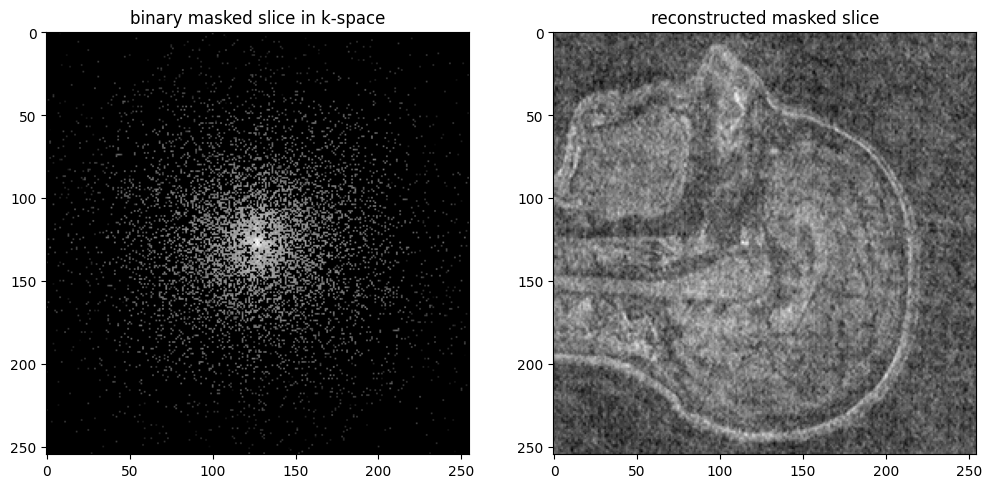

In [159]:
#with normalization
spec = fftshift2d(sval/(m+~keep),ifft=True)
img = np.real(np.fft.ifft2(spec)).astype(np.float32)

plt.figure(figsize=(12,6))
plt.subplot(121), plt.imshow(np.log(np.abs(sval)+1), cmap="gray")
plt.title("binary masked slice in k-space")
# img = (img - img.min()) / (img.max() - img.min())
plt.subplot(122), plt.imshow(img, cmap="gray")
plt.title("reconstructed masked slice")
plt.show()

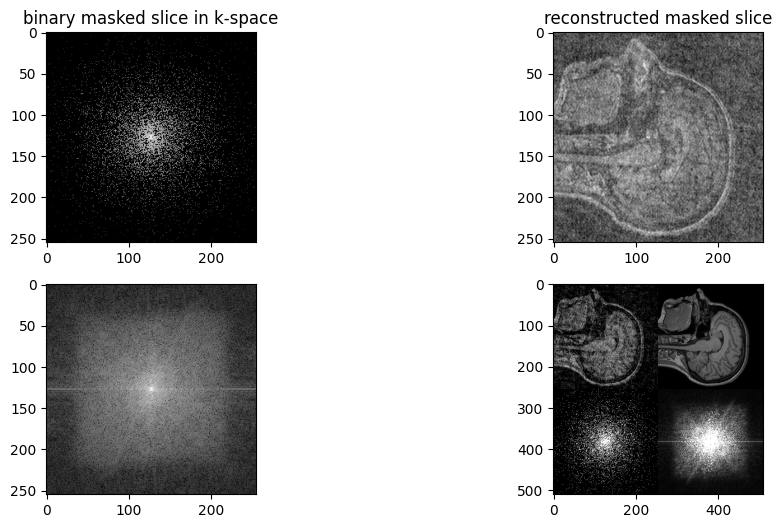

In [160]:

img = np.real(np.fft.ifft2(np.fft.ifftshift(sval/(m+~keep)))).astype(np.float32)
plt.figure(figsize=(12,6))
plt.subplot(221), plt.imshow(np.log(np.abs(sval)+1), cmap="gray")
plt.title("binary masked slice in k-space")
plt.subplot(222), plt.imshow(img, cmap="gray")
plt.title("reconstructed masked slice")
spec2 = np.fft.fft2(slice).astype(np.complex64)
spec2 = np.fft.fftshift(spec2)
plt.subplot(223),plt.imshow(np.log(np.abs(spec2)+1),cmap="gray")
plt.subplot(224),plt.imshow(np.asarray(PIL.Image.open("./IXI002-Guys-0828-T1_075.png"),dtype=np.uint8),cmap="gray")
plt.show()